In [27]:
import os
import pandas as pd
from tqdm import tqdm
import re
import emoji
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [28]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# Load your dataset
df = pd.read_csv('dataTiktok.csv', encoding='utf-8')

# Check first few rows to understand structure
print(df.head())

                                         videoWebUrl  \
0  https://www.tiktok.com/@jennifer.coppen/video/...   
1  https://www.tiktok.com/@jennifer.coppen/video/...   
2  https://www.tiktok.com/@jennifer.coppen/video/...   
3  https://www.tiktok.com/@jennifer.coppen/video/...   
4  https://www.tiktok.com/@jennifer.coppen/video/...   

                                   submittedVideoUrl  \
0  https://www.tiktok.com/@jennifer.coppen/video/...   
1  https://www.tiktok.com/@jennifer.coppen/video/...   
2  https://www.tiktok.com/@jennifer.coppen/video/...   
3  https://www.tiktok.com/@jennifer.coppen/video/...   
4  https://www.tiktok.com/@jennifer.coppen/video/...   

                                               input                  cid  \
0  https://www.tiktok.com/@jennifer.coppen/video/...  7553131484841689863   
1  https://www.tiktok.com/@jennifer.coppen/video/...  7553128544713425671   
2  https://www.tiktok.com/@jennifer.coppen/video/...  7553208885207302930   
3  https://www.tik

In [30]:
df.drop_duplicates(subset='text', inplace=True) 
df.dropna(subset=['text'], inplace=True) 
df.reset_index(drop=True, inplace=True)

df.head()


,videoWebUrl,submittedVideoUrl,input,cid,createTime,createTimeISO,text,diggCount,likedByAuthor,pinnedByAuthor,repliesToId,replyCommentTotal,uid,uniqueId,avatarThumbnail,mentions,detailedMentions
0,https://www.tiktok.com/@jennifer.coppen/video/...,https://www.tiktok.com/@jennifer.coppen/video/...,https://www.tiktok.com/@jennifer.coppen/video/...,7553131484841689863,1758600474,2025-09-23T04:07:54.000Z,cakep till,10101,True,False,NaN,18.0,6861910579557729281,ristyagt,https://p16-common-sign.tiktokcdn-us.com/tos-a...,[],[]
1,https://www.tiktok.com/@jennifer.coppen/video/...,https://www.tiktok.com/@jennifer.coppen/video/...,https://www.tiktok.com/@jennifer.coppen/video/...,7553128544713425671,1758599787,2025-09-23T03:56:27.000Z,keranjang kuningnya mana kak untuk yang ini?,7550,False,False,NaN,9.0,6984326231713956866,wstyyyyyy,https://p16-common-sign.tiktokcdn-us.com/tos-a...,[],[]
2,https://www.tiktok.com/@jennifer.coppen/video/...,https://www.tiktok.com/@jennifer.coppen/video/...,https://www.tiktok.com/@jennifer.coppen/video/...,7553208885207302930,1758618495,2025-09-23T09:08:15.000Z,Soldout,500,False,False,7.553129e+18,NaN,6748085164792579073,jennifer.coppen,https://p16-common-sign.tiktokcdn-us.com/tos-a...,[],[]
3,https://www.tiktok.com/@jennifer.coppen/video/...,https://www.tiktok.com/@jennifer.coppen/video/...,https://www.tiktok.com/@jennifer.coppen/video/...,7553125330203869970,1758599045,2025-09-23T03:44:05.000Z,"""mayi mintak"" 😭🤏🏻",18996,False,False,NaN,6.0,6718152664696275970,viitaminccc,https://p19-common-sign.tiktokcdn-us.com/tos-a...,[],[]
4,https://www.tiktok.com/@jennifer.coppen/video/...,https://www.tiktok.com/@jennifer.coppen/video/...,https://www.tiktok.com/@jennifer.coppen/video/...,7553125789195043592,1758599148,2025-09-23T03:45:48.000Z,“Mayi cantik kan?” atah atah bocil wes bisa be...,25432,False,False,NaN,4.0,6813735812916626434,seracann_,https://p16-common-sign.tiktokcdn-us.com/tos-a...,[],[]


In [31]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_words = set(stopwords.words('indonesian'))

In [32]:

# ============================================================
# CLEANING AND NORMALIZATION OF THE 'text' COLUMN
# ============================================================

# stopwords
stop_words = set(stopwords.words('indonesian'))
custom_stopwords = {
    'untuk', 'yang', 'ini', 'bisa', 'bgt', 'aja', 'se', 'bukan', 'tapi', 'banget', 
    'mungkin', 'kenal', 'udah', 'dulu', 'ga', 'lu', 'itu', 'kenapa', 'buat', 'begitu', 
    'mau', 'sih', 'ada', 'sama', 'di', 'aku', 'kok', 'ya', 'apa', 'btw', 'yg', 'gue', 
    'cuma', 'kamu', 'dari', 'kita', 'selalu', 'dia', 'harus', 'biar', 'bener', 'juga', 
    'gitu', 'gk', 'sudah', 'yah', 'gua', 'iya', 'lagi', 'lo', 'sampe', 'pls', 'atau', 
    'terus', 'ngapain', 'sedih', 'dan', 'pernah', 'eh', 'jadi', 'ke', 'gak', 'wkwk', 
    'deh', 'tpi', 'pliss', 'kalo', 'anjir', 'lebih', 'ampun', 'ngomong', 'oke', 'nanti', 
    'so', 'tetep', 'pasti', 'mereka', 'dengan', 'akan', 'kayak', 'karena', 'kapan', 
    'semua', 'lalu', 'haha', 'lgi', 'duh', 'segala', 'lah', 'ngga', 'ayo', 'nggak', 
    'gampang', 'banyak'
}
stop_words = stop_words.union(custom_stopwords)

# Slang dictionary (for typo correction)
slang_dict = { 
    'mintak': 'minta',
    'tiba tiba': 'tiba-tiba',
    'poninyaa': 'poninya',
    'ngapainnn': 'ngapain Mayi',
    'ADEKK': 'adek',
    'wes': 'sudah',
    'bgt': 'banget',
    'gpp': 'gapapa',
    'sik': 'sih',
    'weh': 'wih',
    'udah': 'sudah',
    'wkwk': 'haha',
    'mayiii': 'mayi',
    'bgtt': 'banget',
    'kak': 'kakak',
    'aja': 'saja',
    'diem': 'diam',
    'bener': 'benar',
    'keliatan': 'kelihatan',
    'ngebosenin': 'membosankan',
    'nanyain': 'menanyakan',
    'btw': 'bt the way',
    'gak': 'tidak',
    'gt': 'gitu',
    'ntar': 'nanti',
    'ntr': 'nanti',
    'gausah': 'tidak usah',
    'gapapa': 'tidak apa-apa',
    'temen': 'teman',
    'emang': 'memang',
    'gimana': 'bagaimana',
    'gk': 'tidak',
    'yg': 'yang'
}

def clean_text(text):
    if pd.isna(text): return ""
    text = str(text)

    #Hilangkan URL, mention, angka, emoji
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"\d+", "", text)

    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Negasi handling
    text = re.sub(r"tidak (\w+)", r"tidak_\1", text)

    #Bersihkan simbol dan ubah huruf kecil
    text = re.sub(r"[^a-zA-Z_\s]", " ", text).lower()

    #Tokenizing
    tokens = word_tokenize(text)

    #Normalisasi slang
    tokens = [slang_dict.get(w, w) for w in tokens]

    #Stopword removal
    filtered = [w for w in tokens if w not in stop_words and len(w) > 3]

    #Stemming
    stemmed = [stemmer.stem(w) for w in filtered]

    #Bigram & Trigram
    bigrams = ['_'.join(bg) for bg in ngrams(stemmed, 2)] if len(stemmed) >= 2 else []
    trigrams = ['_'.join(tg) for tg in ngrams(stemmed, 3)] if len(stemmed) >= 3 else []
    all_terms = stemmed + bigrams + trigrams

    return " ".join(all_terms)

tqdm.pandas(desc="Cleaning Text")
df["cleaned"] = df["text"].progress_apply(clean_text)
df = df[df["cleaned"].str.strip() != ""]

df.to_csv("DataTiktok_Prepocesing.csv", index=False, encoding="utf-8")
print("✅ Data bersih telah disimpan ke dalam 'DataTiktok_Prepocesing.csv'")


Cleaning Text:   0%|          | 0/853 [00:00<?, ?it/s]

Cleaning Text: 100%|██████████| 853/853 [02:44<00:00,  5.19it/s]

✅ Data bersih telah disimpan ke dalam 'DataTiktok_Prepocesing.csv'


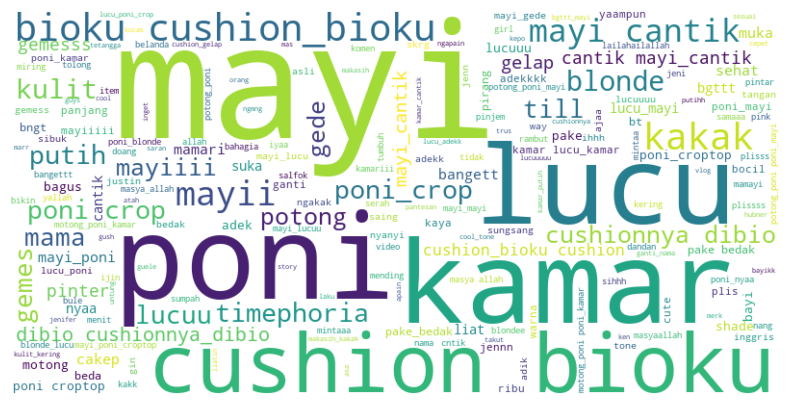

✅ WordCloud telah disimpan dalam bentuk PNG sebagai 'wordcloud_output.png'


In [33]:
# Generate WordCloud from the cleaned text
text_for_wordcloud = " ".join(df["cleaned"].dropna())

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Save the WordCloud as a PNG file
wordcloud.to_file("wordcloud_output.png")

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

print("✅ WordCloud telah disimpan dalam bentuk PNG sebagai 'wordcloud_output.png'")